# Two Ways to Build NN

In [26]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [27]:
# Method 1
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   
        self.predict = torch.nn.Linear(n_hidden, n_output)   

    def forward(self, x):
        x = F.relu(self.hidden(x))      
        x = self.predict(x)             
        return x
net1 = Net(1, 10, 1)

In [28]:
# Method 2
net2 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)

In [29]:
print(net1)     # net1 architecture
print(net2)     # net2 architecture

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)
Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


# Save & Load

In [30]:
torch.manual_seed(1)    # reproducible

# Fake data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)

x,y = Variable(x, requires_grad=False), Variable(y, requires_grad=False)

In [35]:
def save():
    # Build NN
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()

    # Train
    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # plot result
    plt.figure(1, figsize=(10, 3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    
    # 2 ways to save
    torch.save(net1, 'net.pkl')  # Save entire Net
    torch.save(net1.state_dict(), 'net_params.pkl')   # Save parameters(faster, less memory)

In [36]:
def restore_net():
    # restore entire net1 to net2
    net2 = torch.load('net.pkl')
    prediction = net2(x)

    # plot result
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

In [37]:
def restore_params():
    # restore only the parameters in net1 to net3
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    # copy net1's parameters into net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)

    # plot result
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()

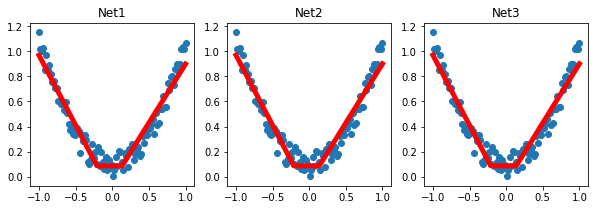

In [38]:
# save net1
save()

# restore entire net (may slow)
restore_net()

# restore only the net parameters
restore_params()

# Batch Training

In [93]:
import torch
import torch.utils.data as Data

torch.manual_seed(1)    # reproducible
None

In [94]:
BATCH_SIZE = 5
x = torch.linspace(1, 10, 10)       # this is x data (torch tensor)
y = torch.linspace(10, 1, 10)       # this is y data (torch tensor)

In [100]:
torch_dataset = Data.TensorDataset(x, y)

In [101]:
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # random shuffle for training
    num_workers=2,              # subprocesses for loading data
)

In [98]:
for epoch in range(3):   # train entire dataset 3 times
    for step, (batch_x, batch_y) in enumerate(loader):  # for each training step
        # train your data...
        print('Epoch: ', epoch, '| Step: ', step, '| batch x: ',
              batch_x.numpy(), '| batch y: ', batch_y.numpy())

Epoch:  0 | Step:  0 | batch x:  [ 5.  7. 10.  3.  4.] | batch y:  [6. 4. 1. 8. 7.]
Epoch:  0 | Step:  1 | batch x:  [2. 1. 8. 9. 6.] | batch y:  [ 9. 10.  3.  2.  5.]
Epoch:  1 | Step:  0 | batch x:  [ 4.  6.  7. 10.  8.] | batch y:  [7. 5. 4. 1. 3.]
Epoch:  1 | Step:  1 | batch x:  [5. 3. 2. 1. 9.] | batch y:  [ 6.  8.  9. 10.  2.]
Epoch:  2 | Step:  0 | batch x:  [ 4.  2.  5.  6. 10.] | batch y:  [7. 9. 6. 5. 1.]
Epoch:  2 | Step:  1 | batch x:  [3. 9. 1. 8. 7.] | batch y:  [ 8.  2. 10.  3.  4.]


### Suppose a different batch size that cannot be fully divided by the number of data entreis:

In [99]:
BATCH_SIZE = 8
loader = Data.DataLoader(
    dataset=torch_dataset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # random shuffle for training
    num_workers=2,              # subprocesses for loading data
)
for epoch in range(3):   # train entire dataset 3 times
    for step, (batch_x, batch_y) in enumerate(loader):  # for each training step
        # train your data...
        print('Epoch: ', epoch, '| Step: ', step, '| batch x: ',
              batch_x.numpy(), '| batch y: ', batch_y.numpy())

Epoch:  0 | Step:  0 | batch x:  [ 4. 10.  9.  8.  7.  6.  1.  2.] | batch y:  [ 7.  1.  2.  3.  4.  5. 10.  9.]
Epoch:  0 | Step:  1 | batch x:  [5. 3.] | batch y:  [6. 8.]
Epoch:  1 | Step:  0 | batch x:  [9. 8. 4. 6. 5. 3. 7. 2.] | batch y:  [2. 3. 7. 5. 6. 8. 4. 9.]
Epoch:  1 | Step:  1 | batch x:  [10.  1.] | batch y:  [ 1. 10.]
Epoch:  2 | Step:  0 | batch x:  [ 5.  1.  3.  7.  6. 10.  9.  8.] | batch y:  [ 6. 10.  8.  4.  5.  1.  2.  3.]
Epoch:  2 | Step:  1 | batch x:  [2. 4.] | batch y:  [9. 7.]
